In [1]:
import os
import warnings
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

from core.TCNmodel import TCNPipeline
from core.optimization import runHyperparameterTuning
from core.metrics import calculateMetrics
from core.plotting import applyStyle, predictionAnalysis, visualizeFeatureMaps, visualizeFLKernels

applyStyle()
warnings.filterwarnings('ignore')

CONFIG = {
    'dataFile': 'Sunspots.csv',
    'trainRatio': 0.8,
    'seqLength': 144,
    'predictionHorizon': 1,
    'epochs': 50,
    'patience': 10,
    'batchSize': 32,
    'channels': [32, 32, 32, 32], 
    'kernelSize': 5,
    'learningRate': 0.002,
    'device': 'cuda' if torch.cuda.is_available() else 'cpu'
}

In [2]:
def loadData(filePath):
    if not os.path.exists(filePath):
        raise FileNotFoundError(f"File '{filePath}' not found inside {os.getcwd()}")

    df = pd.read_csv(filePath)
    targetCol = 'Monthly Mean Total Sunspot Number'
    dateCol = 'Date'

    if targetCol not in df.columns:
        targetCol = df.columns[-1] 
    
    cleanDf = df[[dateCol, targetCol]].copy()
    cleanDf.columns = ['date', 'sunspots']
    
    cleanDf['date'] = pd.to_datetime(cleanDf['date'])
    cleanDf = cleanDf.sort_values('date')
    cleanDf['sunspots'] = cleanDf['sunspots'].interpolate(method='linear')
    
    dates = cleanDf['date'].values
    values = cleanDf['sunspots'].values.reshape(-1, 1)
    
    return dates, values


In [3]:
dates, timeSeries = loadData(CONFIG['dataFile'])

In [4]:
pipeline = TCNPipeline(
    inputSize=1,
    outputSize=1,
    numChannels=CONFIG['channels'],
    kernelSize=CONFIG['kernelSize'],
    dropout=0.2,
    learningRate=CONFIG['learningRate'],
    seqLength=CONFIG['seqLength'],
    batchSize=CONFIG['batchSize'],
    device=CONFIG['device']
)

In [5]:
results = pipeline.run(
    timeseries=timeSeries,
    trainRatio=CONFIG['trainRatio'],
    epochs=CONFIG['epochs'],
    patience=CONFIG['patience']
)

Early stopping triggered at epoch 25


In [6]:
targets = results['targets']
predictions = results['predictions']
trainLosses = results['trainLosses']
valLosses = results['valLosses']
metrics = calculateMetrics(targets, predictions)

In [7]:
metrics

{'mse': 0.10783863067626953,
 'rmse': 0.3283879271171057,
 'mae': 0.23531897366046906,
 'nrmse': 0.07835010451120933}

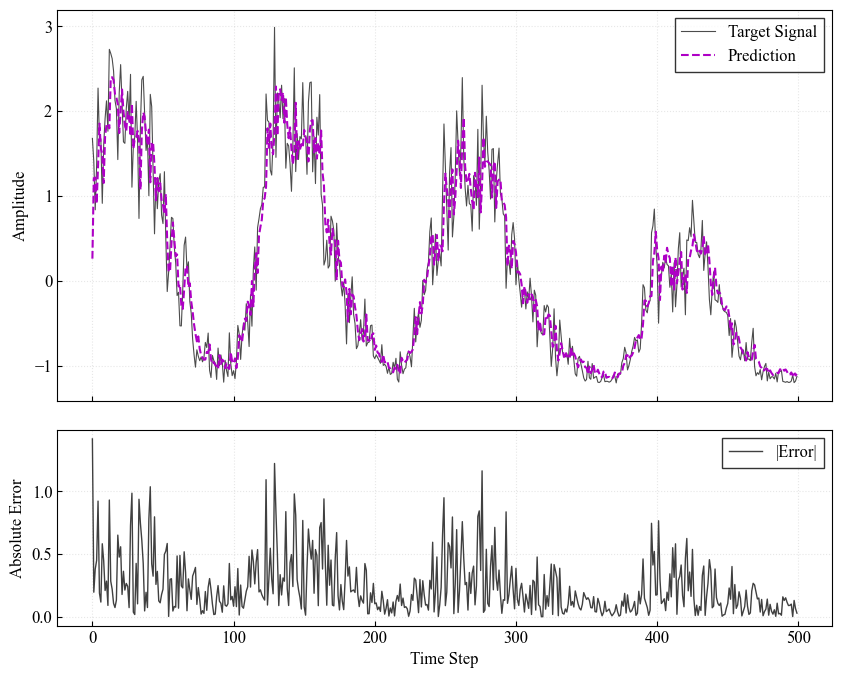

In [8]:
predictionAnalysis(predictions, targets, zoomLimit=500)

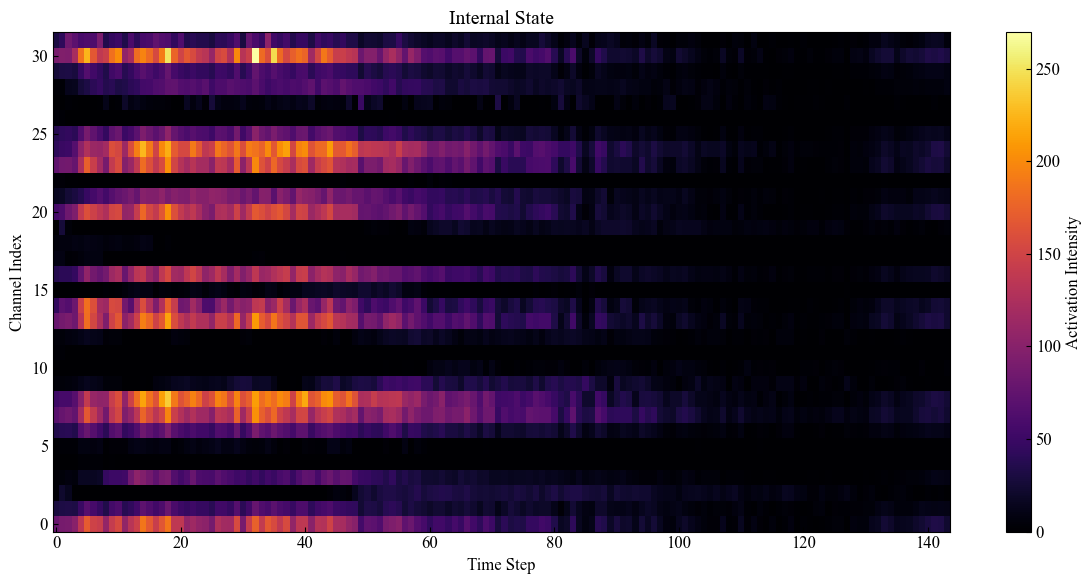

In [9]:
visualizeFeatureMaps(pipeline, timeSeries, sampleIndex=3000)

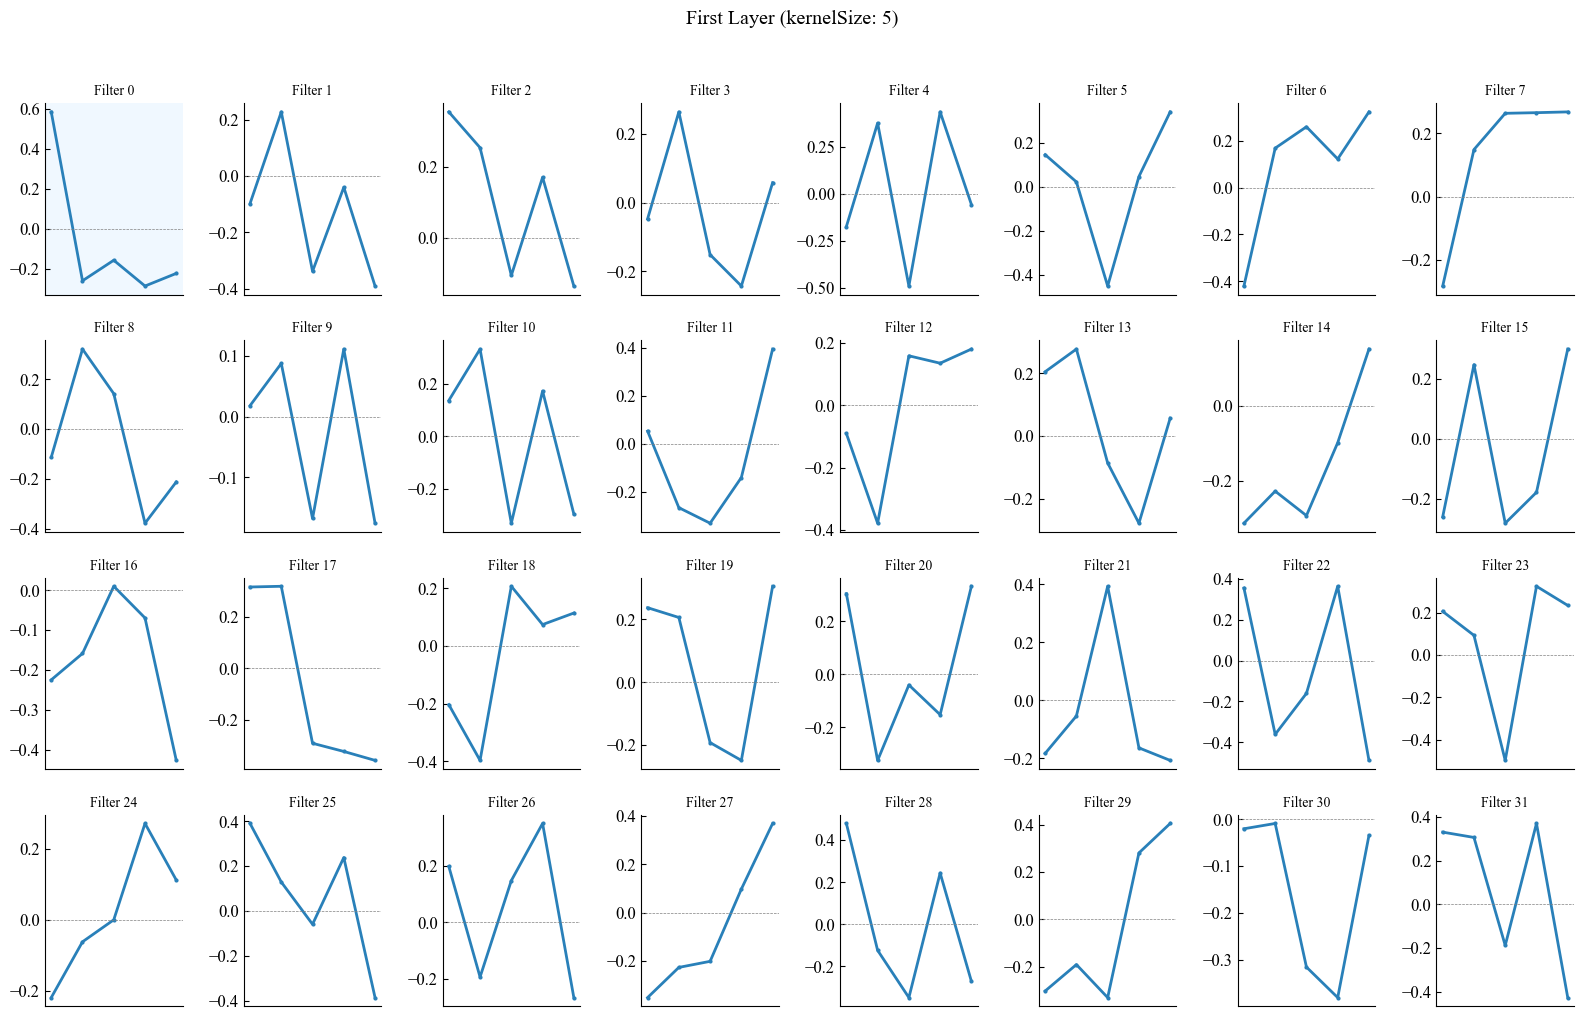

In [10]:
visualizeFLKernels(pipeline)

In [11]:
bestParams = runHyperparameterTuning(timeSeries, CONFIG, nTrials=20)

[I 2025-12-05 11:33:58,461] A new study created in memory with name: no-name-5f8cf6bc-ce7b-4e40-a165-c465762ec3e3
[I 2025-12-05 11:35:18,542] Trial 0 finished with value: 0.3442143966288695 and parameters: {'kernelSize': 3, 'dropout': 0.3671411200689451, 'learningRate': 0.00015901136024188472, 'numLayers': 4, 'numFilters': 32}. Best is trial 0 with value: 0.3442143966288695.


Early stopping triggered at epoch 11


[I 2025-12-05 11:37:18,139] Trial 1 finished with value: 0.3367301881444995 and parameters: {'kernelSize': 5, 'dropout': 0.3605341177703791, 'learningRate': 0.001587184793131792, 'numLayers': 5, 'numFilters': 64}. Best is trial 1 with value: 0.3367301881444995.


Early stopping triggered at epoch 15


[I 2025-12-05 11:38:00,170] Trial 2 finished with value: 0.3356747708809422 and parameters: {'kernelSize': 5, 'dropout': 0.009549546357876748, 'learningRate': 0.00020867934133936484, 'numLayers': 2, 'numFilters': 32}. Best is trial 2 with value: 0.3356747708809422.


Early stopping triggered at epoch 16


[I 2025-12-05 11:39:39,368] Trial 3 finished with value: 0.33220645545426486 and parameters: {'kernelSize': 5, 'dropout': 0.0543338508496099, 'learningRate': 0.0017047648876194932, 'numLayers': 5, 'numFilters': 32}. Best is trial 3 with value: 0.33220645545426486.


Early stopping triggered at epoch 11


[I 2025-12-05 11:42:00,477] Trial 4 finished with value: 0.33579627106849974 and parameters: {'kernelSize': 7, 'dropout': 0.042769497957139024, 'learningRate': 0.00026922231497839775, 'numLayers': 5, 'numFilters': 64}. Best is trial 3 with value: 0.33220645545426486.


Early stopping triggered at epoch 7


[I 2025-12-05 11:43:35,410] Trial 5 finished with value: 0.3395573077535968 and parameters: {'kernelSize': 7, 'dropout': 0.3262271959002418, 'learningRate': 0.00041082353079574475, 'numLayers': 5, 'numFilters': 64}. Best is trial 3 with value: 0.33220645545426486.


Early stopping triggered at epoch 6


[I 2025-12-05 11:43:50,945] Trial 6 finished with value: 0.3496398273183944 and parameters: {'kernelSize': 3, 'dropout': 0.2185415857803984, 'learningRate': 0.004310249714547462, 'numLayers': 2, 'numFilters': 32}. Best is trial 3 with value: 0.33220645545426486.


Early stopping triggered at epoch 6


[I 2025-12-05 11:44:31,561] Trial 7 finished with value: 0.33864685282949286 and parameters: {'kernelSize': 7, 'dropout': 0.2516394379583532, 'learningRate': 0.004731125986499659, 'numLayers': 4, 'numFilters': 32}. Best is trial 3 with value: 0.33220645545426486.


Early stopping triggered at epoch 10


[I 2025-12-05 11:45:12,667] Trial 8 finished with value: 0.3540419775123544 and parameters: {'kernelSize': 3, 'dropout': 0.3684758374958898, 'learningRate': 0.00019490127550947391, 'numLayers': 2, 'numFilters': 64}. Best is trial 3 with value: 0.33220645545426486.


Early stopping triggered at epoch 13


[I 2025-12-05 11:46:34,069] Trial 9 finished with value: 0.33077650282115273 and parameters: {'kernelSize': 7, 'dropout': 0.1264306145162044, 'learningRate': 0.000336055603730256, 'numLayers': 4, 'numFilters': 32}. Best is trial 9 with value: 0.33077650282115273.


Early stopping triggered at epoch 8


[I 2025-12-05 11:46:59,955] Trial 10 finished with value: 0.3506936144373087 and parameters: {'kernelSize': 7, 'dropout': 0.49405825414653615, 'learningRate': 0.0006669520217761648, 'numLayers': 3, 'numFilters': 16}. Best is trial 9 with value: 0.33077650282115273.


Early stopping triggered at epoch 15


[I 2025-12-05 11:48:16,391] Trial 11 finished with value: 0.3310271395133961 and parameters: {'kernelSize': 5, 'dropout': 0.10623064179172255, 'learningRate': 0.001533069738483005, 'numLayers': 4, 'numFilters': 32}. Best is trial 9 with value: 0.33077650282115273.


Early stopping triggered at epoch 14


[I 2025-12-05 11:49:02,221] Trial 12 finished with value: 0.3261248389039349 and parameters: {'kernelSize': 5, 'dropout': 0.13855327105084847, 'learningRate': 0.0008247887449097549, 'numLayers': 4, 'numFilters': 16}. Best is trial 12 with value: 0.3261248389039349.
[I 2025-12-05 11:49:58,523] Trial 13 finished with value: 0.3381671655879814 and parameters: {'kernelSize': 7, 'dropout': 0.1454996477206259, 'learningRate': 0.0001010064437109112, 'numLayers': 3, 'numFilters': 16}. Best is trial 12 with value: 0.3261248389039349.
[I 2025-12-05 11:50:45,546] Trial 14 finished with value: 0.33316960138186413 and parameters: {'kernelSize': 5, 'dropout': 0.19167385520665337, 'learningRate': 0.0006960743575896955, 'numLayers': 3, 'numFilters': 16}. Best is trial 12 with value: 0.3261248389039349.
[I 2025-12-05 11:51:47,959] Trial 15 finished with value: 0.3371896584081994 and parameters: {'kernelSize': 5, 'dropout': 0.11872367532307847, 'learningRate': 0.0004724424510738554, 'numLayers': 4, 'num

Early stopping triggered at epoch 10


[I 2025-12-05 11:52:28,902] Trial 16 finished with value: 0.3363728031694851 and parameters: {'kernelSize': 7, 'dropout': 0.2608332636450018, 'learningRate': 0.0025821071564557934, 'numLayers': 4, 'numFilters': 16}. Best is trial 12 with value: 0.3261248389039349.


Early stopping triggered at epoch 12


[I 2025-12-05 11:52:59,658] Trial 17 finished with value: 0.3417548889530423 and parameters: {'kernelSize': 5, 'dropout': 0.1661637262189508, 'learningRate': 0.000996742199965268, 'numLayers': 3, 'numFilters': 16}. Best is trial 12 with value: 0.3261248389039349.


Early stopping triggered at epoch 9


[I 2025-12-05 11:53:58,446] Trial 18 finished with value: 0.3335377232943727 and parameters: {'kernelSize': 7, 'dropout': 0.09626624430133772, 'learningRate': 0.00035500506869667897, 'numLayers': 4, 'numFilters': 32}. Best is trial 12 with value: 0.3261248389039349.
[I 2025-12-05 11:54:24,608] Trial 19 finished with value: 0.3366123230413759 and parameters: {'kernelSize': 3, 'dropout': 0.07150972767011235, 'learningRate': 0.007014604874536608, 'numLayers': 3, 'numFilters': 16}. Best is trial 12 with value: 0.3261248389039349.


Early stopping triggered at epoch 11
Best RMSE found: 0.3261
  kernelSize: 5
  dropout: 0.13855327105084847
  learningRate: 0.0008247887449097549
  numLayers: 4
  numFilters: 16


In [12]:
bestChannels = [bestParams['numFilters']] * bestParams['numLayers']

In [13]:
CONFIG.update({
    'kernelSize': bestParams['kernelSize'],
    'dropout': bestParams['dropout'],
    'learningRate': bestParams['learningRate'],
    'channels': bestChannels
})

In [14]:
pipeline = TCNPipeline(
    inputSize=1,
    outputSize=1,
    numChannels=CONFIG['channels'],
    kernelSize=CONFIG['kernelSize'],
    dropout=CONFIG['dropout'],
    learningRate=CONFIG['learningRate'],
    seqLength=CONFIG['seqLength'],
    batchSize=CONFIG['batchSize'],
    device=CONFIG['device']
)

In [15]:
results = pipeline.run(
    timeseries=timeSeries,
    trainRatio=CONFIG['trainRatio'],
    epochs=CONFIG['epochs'],
    patience=CONFIG['patience']
)

Early stopping triggered at epoch 27


In [16]:
targets = results['targets']
predictions = results['predictions']
trainLosses = results['trainLosses']
valLosses = results['valLosses']
metrics = calculateMetrics(targets, predictions)

In [17]:
metrics

{'mse': 0.10859392583370209,
 'rmse': 0.32953592495159323,
 'mae': 0.23634566366672516,
 'nrmse': 0.07862400541585089}

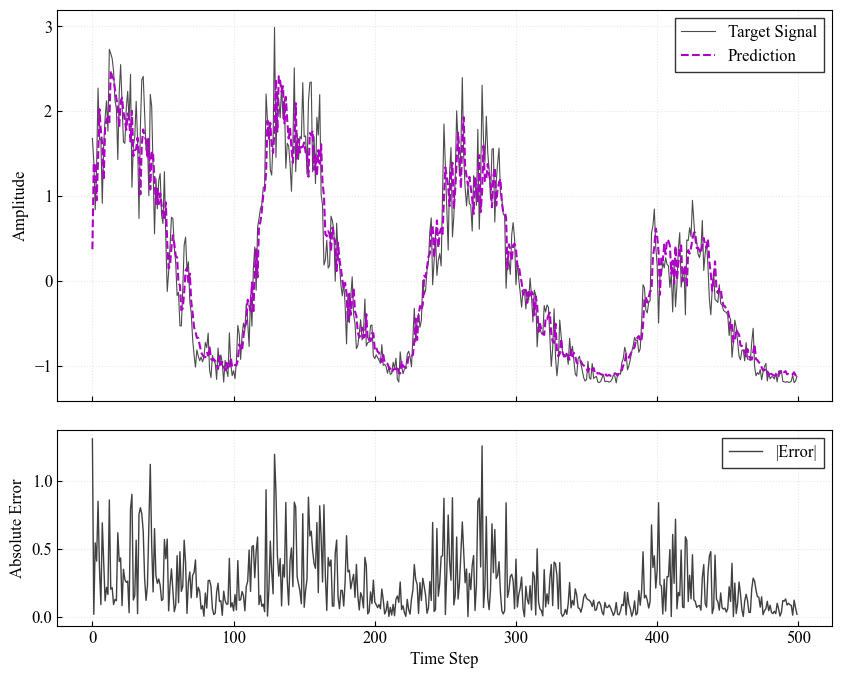

In [18]:
predictionAnalysis(predictions, targets, zoomLimit=500)